# Análisis de los datos del COVID-19 en España
2020 será siempre recordado como el año de la pandemia de COVID-19. España ha sido y es uno de los países más afectados, tanto en la primera ola en marzo como en la siguiente en setiembre.

Para analizar la situación, a nivel nacional, autonómico y provincial, se usarán los datos proporcionados por el repositorio Escovid19data (https://github.com/montera34/escovid19data), que se encarga de recopilar los datos de cada provincia y CCAA, tratarlos y presentarlos de una manera correcta para su visualización y uso.

In [5]:
# Import required packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from ipywidgets import widgets
import matplotlib.dates as mdates
import chart_studio.plotly as py
sns.set_style(style="darkgrid")

In [2]:
# Load each data file from the repository
ccaa = pd.read_csv('https://raw.githubusercontent.com/montera34/escovid19data/master/data/output/covid19-ccaa-spain_consolidated.csv')
provincias = pd.read_csv('https://raw.githubusercontent.com/montera34/escovid19data/master/data/output/covid19-provincias-spain_consolidated.csv')
spain = pd.read_csv('https://raw.githubusercontent.com/montera34/escovid19data/master/data/output/covid19-spain_consolidated.csv')

---

## España 

Antes de empezar con en el análisis, es útil averiguar de que información disponemos para cada día a nivel nacional.

In [3]:
spain.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   252 non-null    object 
 1   new_cases              252 non-null    int64  
 2   PCR                    252 non-null    int64  
 3   TestAc                 252 non-null    int64  
 4   activos                252 non-null    int64  
 5   hospitalized           252 non-null    int64  
 6   intensive_care         252 non-null    int64  
 7   deceased               252 non-null    int64  
 8   cases_accumulated      252 non-null    int64  
 9   cases_accumulated_PCR  252 non-null    int64  
 10  recovered              252 non-null    float64
 11  cases_14days           238 non-null    float64
 12  cases_7days            245 non-null    float64
 13  cases_PCR_14days       238 non-null    float64
 14  cases_PCR_7days        245 non-null    float64
 15  daily_

### Casos diagnosticados con pruebas PCR
La prueba PCR (Polimerasa Chain Reaction) es una prueba de diagnóstico utilizada para detectar fragmentos del material genético de un patógeno. En este caso en concreto, el patógeno se corresponde con el virus SARS-CoV-2. La idea es sencilla: se toma una muestra respiratoria de la persona sospechosa de infección, y se analiza en un laboratorio de microbiología con un PCR en busca de una molécula de ARN del virus. El positivo vendría cuando la prueba detecta ese ARN del virus, mientras será negativo en caso contrario.

Uno de los factores importantes para conocer el estado actual de la pandémia en un país es el número de nuevos contagios diagnosticados diarios. 

In [7]:
fig = go.Figure()
fig.add_trace(go.Bar(x=spain['date'], y=spain['PCR'], name= 'Nuevos PCR'))
fig.add_trace(go.Bar(x=spain['date'], y=spain['new_cases'], name='Nuevos casos'))
fig.update_layout(legend=dict(orientation='h', bgcolor='LightSteelBlue'),title='Casos diarios')
#fig.add_hline()
#plt.axvline(x=pd.to_datetime('21-06-2020'), color='r')
#plt.text(x=pd.to_datetime('22-06-2020'), y=np.mean(total['PCR']),  rotation=90, s='Fin Estado de Alarma', color='r', bbox=dict(facecolor='black', alpha=0.20))
py.iplot(fig, filename='new-cases')

Las dos olas se pueden diferenciar claramente. Los efectos del confinamiento, desescalada y fin del Estado de Alarma son también evidentes, ya que el número de contagios diarios decae practicamente hasta principios de julio, fruto del parón social y laboral del país. Es entonces cuando empiezan a aumentar los nuevos positivos, seguramente porque la "Nueva Normalidad" lleva vigente 1-2 semanas en toda España, y por lo tanto la población empieza poco a poco a interactuar de nuevo. El hecho de que esta vuelta a la socialización y al trabajo se diera en verano seguramente no ayuda tampoco.

Si nos fijamos en los positivos acumulados, las tendencias son prácticamente las mismas, como es lógico.

In [7]:
fig = go.Figure(data=[go.Bar(x=spain['date'], y=spain['cases_accumulated_PCR'])], layout=go.Layout(title=go.layout.Title(text='Casos PCR acumulados')))
fig.show()

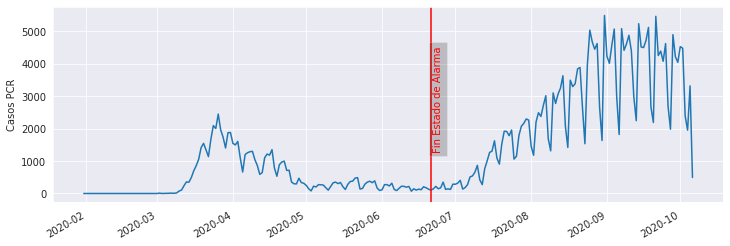

In [8]:
spain['date'] = pd.to_datetime(spain['date'])
fig = plt.figure(figsize=(12,4))
sns.lineplot(x='date', y='PCR', data=spain)
plt.axvline(x=pd.to_datetime('21-06-2020'), color='r')
plt.text(x=pd.to_datetime('22-06-2020'), y=np.mean(spain['PCR']),  rotation=90, s='Fin Estado de Alarma', color='r', bbox=dict(facecolor='black', alpha=0.20))
plt.xlabel('')
plt.ylabel('Casos PCR')
fig.autofmt_xdate()

In [9]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True)
fig.add_trace(go.Bar(x=spain['date'], y=spain['hospitalized'], name='Hospitalizados'), row=1, col=1)
fig.add_trace(go.Bar(x=spain['date'], y=spain['intensive_care'], name='Cuidados intensivos'), row=2, col=1)
fig.add_trace(go.Bar(x=spain['date'], y=spain['recovered'], name='Recuperados'), row=3, col=1)
fig.update_layout(legend=dict(orientation='h', bgcolor='LightSteelBlue'), title='Hospitalizados, en UCI y recuperados')
fig.show()

Otros indicadores útiles para valorar el estado actual de la pandemia son el número de positivos hospitalizados, en la UCI y recuperados. Como se puede observar, en el peor momento de la primera ola (finales de marzo-mayo) es cuando se produjo el mayor número de personas hospitalizadas o en la UCI, mientras que los recuperados iban aumentando a medida que pasaba las semanas. Durante el inicio del verano los ingresados disminuyen, fruto del descenso de los contagios debido al confinamiento y la desescalada. Una vez llega Agosto, se empiezan a notar los efectos de la "nueva normalidad", y los hospitalizados e ingresados en UCI por COVID empiezan a aumentar de nuevo.

Durante todo este tiempo, las cifras de recuperados no hacen más que aumentar, debido seguramente al gran número de personas infectadas con anterioridad.

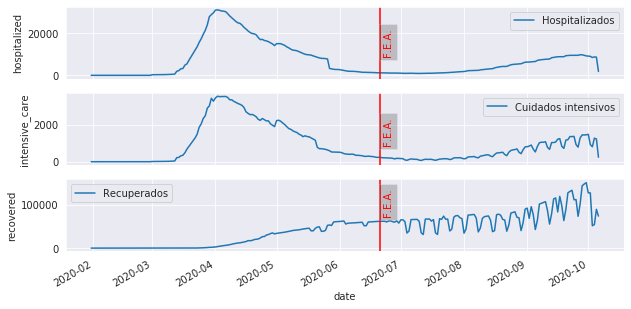

In [10]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,5), sharex=True)
sns.lineplot(x='date', y='hospitalized', data=spain, label='Hospitalizados', ax=ax1)
ax1.axvline(x=pd.to_datetime('21-06-2020'), color='r')
ax1.text(x=pd.to_datetime('22-06-2020'), y=10000,  rotation=90, s='F.E.A.', color='r', bbox=dict(facecolor='black', alpha=0.20))
sns.lineplot(x='date', y='intensive_care', data=spain, label='Cuidados intensivos', ax=ax2)
ax2.axvline(x=pd.to_datetime('21-06-2020'), color='r')
ax2.text(x=pd.to_datetime('22-06-2020'), y=1000,  rotation=90, s='F.E.A.', color='r', bbox=dict(facecolor='black', alpha=0.20))
sns.lineplot(x='date', y='recovered', data=spain, label='Recuperados', ax=ax3)
ax3.axvline(x=pd.to_datetime('21-06-2020'), color='r',)
ax3.text(x=pd.to_datetime('22-06-2020'), y=78000,  rotation=90, s='F.E.A.', color='r', bbox=dict(facecolor='black', alpha=0.20))
f.autofmt_xdate()
plt.legend()

La peor cifra, sin embargo, es la de los fallecidos durante la pandemia.

In [11]:
fig = go.Figure(data=[go.Bar(x=spain['date'], y=spain['daily_deaths'])], layout=go.Layout(title=go.layout.Title(text='Fallecimientos diarios')))
fig.update_yaxes(range=[0,1200])
fig.show()

Durante la primera ola, se alcanzaron cifras diarias de más de 1000 muertos diarios positivos por COVID. Gracias al confinamiento, estas cifras fueron dismuyendo lentamente durante mayo y junio, llegando a su mínimo durante el verano. Una vez los contagios e infectados vuelven a incrementarse a finales de agosto, los fallecidos empiezan a aumentar también.

In [12]:
fig = go.Figure(data=[go.Bar(x=spain['date'], y=spain['deceased'])], layout=go.Layout(title=go.layout.Title(text='Fallecimientos acumulados')))
fig.show()

En el acumulado, se puede observar un estancamiento en el número de fallecidos durante el verano, pero a partir de los últimos días de agosto se observa de nuevo una tendencia al aumento.

## CCAA

A partir de los datos separados por Comunidades Autónomas es posible seguir la evolución de la pandemia en estas.

In [4]:
ccaa.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730 entries, 0 to 4729
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ccaa                          4730 non-null   object 
 1   ine_code                      4730 non-null   int64  
 2   date                          4730 non-null   object 
 3   new_cases                     1017 non-null   float64
 4   PCR                           1456 non-null   float64
 5   TestAc                        448 non-null    float64
 6   activos                       763 non-null    float64
 7   hospitalized                  3452 non-null   float64
 8   intensive_care                3217 non-null   float64
 9   deceased                      3975 non-null   float64
 10  cases_accumulated             2352 non-null   float64
 11  cases_accumulated_PCR         3423 non-null   float64
 12  recovered                     1827 non-null   float64
 13  num

In [5]:
# Drop ine_code
ccaa = ccaa.drop('ine_code', axis=1)
# show columns
ccaa.columns
# create new df with accumulated info
ccaa_accumulated = ccaa.groupby('ccaa').tail(1)
# sum columns for total
total = ccaa_accumulated.sum(axis=0).T
total['ccaa'] = 'España'
total['date'] = ccaa_accumulated['date'].tail(1)
ccaa_accumulated = ccaa_accumulated.append((total), ignore_index=True)
# estimate AI per week
ccaa_accumulated['cases_per_cienmil_week'] = ccaa_accumulated['cases_7days']*100000/ccaa_accumulated['poblacion']

Empecemos con una tabla resumen: en ella se muestran los casos acumulados diagnosticados por PCR, el número de nuevos casos (diarios, en 7 y en 14 días) y la IA por 100000 habitantes para cada comunidad autónoma, ordenado por IA:

In [6]:
ccaa_accumulated[['ccaa','cases_accumulated_PCR', 'new_cases', 'cases_7days', 'cases_14days', 'cases_per_cienmil_week']].sort_values(by='cases_per_cienmil_week', ascending=False)

,ccaa,cases_accumulated_PCR,new_cases,cases_7days,cases_14days,cases_per_cienmil_week
15,"Murcia, Región de",21129.0,387.0,2592.0,5674.0,173.505822
9,Ceuta,682.0,9.0,90.0,197.0,106.160869
8,Cataluña,146699.0,NaN,7430.0,14663.0,96.805081
3,"Balears, Illes",NaN,92.0,874.0,1728.0,76.035704
5,Cantabria,7061.0,NaN,326.0,742.0,56.102623
12,Galicia,NaN,NaN,1451.0,2989.0,53.750714
4,Canarias,14278.0,125.0,1009.0,2219.0,46.856374
19,España,797718.0,1386.0,13772.0,28212.0,29.285797
0,Andalucía,64774.0,NaN,NaN,NaN,NaN
1,Aragón,38141.0,NaN,NaN,NaN,NaN


En la siguiente tabla se muestran los fallecimientos acumulados, diarios, incrementos respecto al día anterior, en la última semana y por cada 100000 habitantes, ordenados por este último:

In [7]:
ccaa_accumulated[['ccaa', 'deceased', 'daily_deaths', 'daily_deaths_inc', 'deaths_last_week', 'deceassed_per_100000']].sort_values(by='deceassed_per_100000', ascending=False)

,ccaa,deceased,daily_deaths,daily_deaths_inc,deaths_last_week,deceassed_per_100000
19,España,39723.0,90.0,15.8,819.0,1275.91
8,Cataluña,13295.0,0.0,0.0,63.0,173.22
6,Castilla - La Mancha,3342.0,6.0,0.2,86.0,164.40
13,"Madrid, Comunidad de",10654.0,45.0,0.4,289.0,159.89
18,"Rioja, La",421.0,0.0,0.0,12.0,132.89
1,Aragón,1421.0,0.0,0.0,8.0,107.71
7,Castilla y León,2386.0,16.0,0.7,85.0,99.44
16,"Navarra, Comunidad Foral de",590.0,6.0,1.0,18.0,90.18
17,País Vasco,1304.0,0.0,0.0,37.0,59.06
11,Extremadura,619.0,2.0,0.3,32.0,57.97


Aunque una imagen vale más que una tabla. En la siguiente figura se muestra el número de casos diagnosticados por PCR para cada autonomia:

In [11]:
fig = go.Figure(layout=go.Layout(title=go.layout.Title(text='Casos de PCR acumulados')))
fig.add_trace(go.Bar(y=ccaa_accumulated['ccaa'], x=ccaa_accumulated['cases_accumulated_PCR'], orientation='h'), )
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'}, height=600, width=800)
fig.show()

In [18]:
def create_interactive_plot(df, ccaa_series, dates, traces, title_text):
    widget = widgets.Dropdown(
    options=ccaa_series.unique().tolist(),
    description='CCAA'
    )
    g = go.FigureWidget(layout=go.Layout(
                        title=dict(
                            text=title_text
                        ), legend=dict(orientation='h', bgcolor='LightSteelBlue'),
                        barmode='overlay'
                    ))
    for trace, trace_name in traces:
        g.add_trace(go.Bar(x=dates, y=df[trace], name=trace_name))

    def validate():
        if widget.value in ccaa_series.unique():
            return True
        else:
            return False

    def response(change):
        if validate():
            filter_list = [i for i in ccaa_series == widget.value]
            temp_df = df[filter_list]
            x = temp_df['date']
            i=0
        with g.batch_update():
            for trace, trace_name in traces:
                g.data[i].x = x
                g.data[i].y = temp_df[trace]
                i+=1
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = ''
            g.layout.yaxis.title = ''
    widget.observe(response, names='value')
    return widgets.VBox([widget, g]).show(renderer='svg')

In [19]:
create_interactive_plot(ccaa, ccaa['ccaa'], ccaa['date'], [['num_casos', '# casos'], ['num_casos_prueba_pcr', '# casos PCR']], 'Casos PCR por CCAA')

In [20]:
create_interactive_plot(ccaa, ccaa['ccaa'], ccaa['date'], [['activos', 'Activos'], ['hospitalized', 'Hospitalizados'], ['daily_deaths', 'Fallecidos']], 'Casos activos, hospitalizados y fallecidos por CCAA' )

## Provincias

In [21]:
create_interactive_plot(provincias, provincias['province'], provincias['date'], [['num_casos', '# casos'], ['num_casos_prueba_pcr', '# casos PCR']], 'Casos PCR por provincia')